In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../..")

from gob.benchmarks import *
from gob.optimizers import *
import matplotlib
matplotlib.rcParams.update({"text.usetex": True})

In [2]:
class MinWrapper:
  def __init__(self, func):
    self.func = func
    self.visual_bounds = func.visual_bounds
    self.values = []
  
  def __call__(self, x):
    y = self.func(x)
    self.values.append(y)
    return y
  
  def get_min_per_iteration(self, n_particles):
    mins = []
    for i in range(len(self.values) // n_particles + 1):
      prev_min = mins[-1] if mins else float("inf")
      actual_min = np.min(self.values[i * n_particles : (i + 1) * n_particles])
      mins.append(min(prev_min, actual_min))
    return mins

class MinWrapperGrad:
  def __init__(self, func):
    self.func = func
    self.visual_bounds = func.visual_bounds
    self.values = []
    self.prev_sample = None
  
  def __call__(self, x):
    y = self.func(x)
    if self.prev_sample is None or not np.all(np.abs(x - self.prev_sample) <= 2e-9):
      self.values.append(y)
    self.prev_sample = x
    return y
  
  def get_min_per_iteration(self, n_particles):
    mins = []
    for i in range(len(self.values) // n_particles):
      prev_min = mins[-1] if mins else float("inf")
      actual_min = np.min(self.values[i * n_particles : (i + 1) * n_particles])
      mins.append(min(prev_min, actual_min))
    return mins

In [3]:
def format_results(res):
  for i in range(len(res)):
    if len(res[i]) < iter:
      print(f"Run {i} of mins has length {len(res[i])} instead of {iter}")
      # Copy the last value to extend the length
      last_value = res[i][-1]
      res[i] = list(res[i]) + [last_value] * (iter - len(res[i]))

In [4]:
dim = 8
g = Rastrigin()
bounds = augment_dimensions(g.visual_bounds, dim)
n_particles = 150
iter = 1000
verbose = False
n_runs = 5
wrapper = MinWrapperGrad
alg = CBO
gcn_alg = GCN_CBO
sigma = 1 / n_particles ** 2 if alg == SBS else 5.1

In [5]:
mins = []
for i in range(n_runs):
  f = wrapper(g)

  opt = alg(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, verbose=verbose)
  res = opt.minimize(f)
  print(f"Results for {opt}: {res[1]}")
  mins.append(f.get_min_per_iteration(n_particles)[:iter])

format_results(mins)
mins = np.array(mins)

Results for CBO: 58.750749156719635
Results for CBO: 64.73915097022999
Results for CBO: 42.74419633337374
Results for CBO: 53.892145590298284
Results for CBO: 60.97835311105048


In [6]:
mins_sigma = []
for i in range(n_runs):
  f = wrapper(g)

  opt = gcn_alg(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, sigma_noise=sigma, verbose=verbose)
  res = opt.minimize(f)
  print(f"Results for {opt}: {res[1]}")
  mins_sigma.append(f.get_min_per_iteration(n_particles)[:iter])

format_results(mins_sigma)
mins_sigma = np.array(mins_sigma)

Results for GCN-CBO: 52.975746756631295
Results for GCN-CBO: 46.279631066283144
Results for GCN-CBO: 47.89092034298416
Results for GCN-CBO: 44.7056673740207
Results for GCN-CBO: 52.39230759194645


In [7]:
mins_sigma_e7 = []
for i in range(n_runs):
  f = wrapper(g)

  opt = gcn_alg(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, sigma_noise=1e-7, verbose=verbose)
  res = opt.minimize(f)
  print(f"Results for {opt}: {res[1]}")
  mins_sigma_e7.append(f.get_min_per_iteration(n_particles)[:iter])

format_results(mins_sigma_e7)
mins_sigma_e7 = np.array(mins_sigma_e7)

Results for GCN-CBO: 60.65419340086321
Results for GCN-CBO: 53.49966637195473
Results for GCN-CBO: 39.70162082939728
Results for GCN-CBO: 37.071920677510946
Results for GCN-CBO: 43.462240460066596


In [8]:
mins_sigma_1 = []
for i in range(n_runs):
  f = wrapper(g)

  opt = gcn_alg(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, sigma_noise=1, verbose=verbose)
  res = opt.minimize(f)
  print(f"Results for {opt}: {res[1]}")
  mins_sigma_1.append(f.get_min_per_iteration(n_particles)[:iter])

format_results(mins_sigma_1)
mins_sigma_1 = np.array(mins_sigma_1)

Results for GCN-CBO: 36.137091106037204
Results for GCN-CBO: 44.11399571843906
Results for GCN-CBO: 48.69072256804034
Results for GCN-CBO: 52.271547753627985
Results for GCN-CBO: 50.00169380390847


In [9]:
mins_sigma_10 = []
for i in range(n_runs):
  f = wrapper(g)

  opt = gcn_alg(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, sigma_noise=10, verbose=verbose)
  res = opt.minimize(f)
  print(f"Results for {opt}: {res[1]}")
  mins_sigma_10.append(f.get_min_per_iteration(n_particles)[:iter])

format_results(mins_sigma_10)
mins_sigma_10 = np.array(mins_sigma_10)

Results for GCN-CBO: 46.47391274922485
Results for GCN-CBO: 48.429946269227266
Results for GCN-CBO: 48.16096132156453
Results for GCN-CBO: 50.06904429594806
Results for GCN-CBO: 36.759811825388894


In [10]:
mins_sigma_100 = []
for i in range(n_runs):
  f = wrapper(g)

  opt = gcn_alg(bounds=bounds, n_particles=n_particles, iter=iter, sigma=sigma, sigma_noise=100, verbose=verbose)
  res = opt.minimize(f)
  print(f"Results for {opt}: {res[1]}")
  mins_sigma_100.append(f.get_min_per_iteration(n_particles)[:iter])

format_results(mins_sigma_100)
mins_sigma_100 = np.array(mins_sigma_100)

Results for GCN-CBO: 49.54844325531973
Results for GCN-CBO: 53.418160387069776
Results for GCN-CBO: 50.09650265806174
Results for GCN-CBO: 48.13936492795656
Results for GCN-CBO: 46.526382905364926


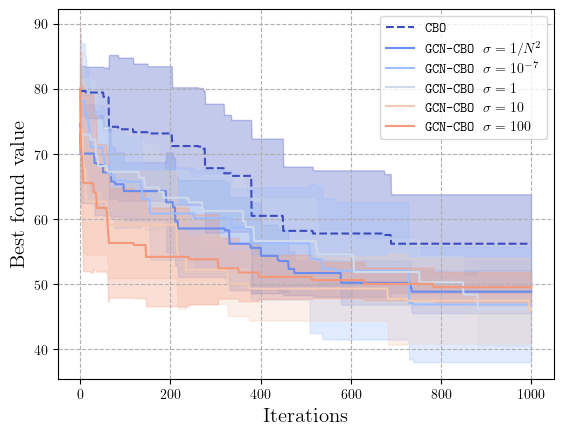

In [11]:
latex_label = lambda s: r"\texttt{" + s.replace("_", r"\_") + "}"

cmap = matplotlib.colormaps["coolwarm"]

c0 = cmap(0)
c1 = cmap(0.15)
c2 = cmap(0.30)
c3 = cmap(0.45)
c4 = cmap(0.60)
c5 = cmap(0.75)

alg_name = str(alg([]))
gcn_alg_name = str(gcn_alg([]))

mean = mins.mean(axis=0)
std = mins.std(axis=0)
plt.plot(mean, label=latex_label(alg_name), linestyle="--", color=c0)
plt.fill_between(range(iter), mean - std, mean + std, alpha=0.3, color=c0)

mean = mins_sigma.mean(axis=0)
std = mins_sigma.std(axis=0)
plt.plot(mean, label=latex_label(gcn_alg_name + r" $\sigma = 1 / N^2$"), linestyle="-", c=c1)
plt.fill_between(range(len(mean)), mean - std, mean + std, alpha=0.3, color=c1)

mean = mins_sigma_e7.mean(axis=0)
std = mins_sigma_e7.std(axis=0)
plt.plot(mean, label=latex_label(gcn_alg_name + r" $\sigma = 10^{-7}$"), linestyle="-", c=c2)
plt.fill_between(range(iter), mean - std, mean + std, alpha=0.3, color=c2)

mean = mins_sigma_1.mean(axis=0)
std = mins_sigma_1.std(axis=0)
plt.plot(mean, label=latex_label(gcn_alg_name + r" $\sigma = 1$"), linestyle="-", c=c3)
plt.fill_between(range(iter), mean - std, mean + std, alpha=0.3, color=c3)

mean = mins_sigma_10.mean(axis=0)
std = mins_sigma_10.std(axis=0)
plt.plot(mean, label=latex_label(gcn_alg_name + r" $\sigma = 10$"), linestyle="-", c=c4)
plt.fill_between(range(iter), mean - std, mean + std, alpha=0.3, color=c4)

mean = mins_sigma_100.mean(axis=0)
std = mins_sigma_100.std(axis=0)
plt.plot(mean, label=latex_label(gcn_alg_name + r" $\sigma = 100$"), linestyle="-", c=c5)
plt.fill_between(range(iter), mean - std, mean + std, alpha=0.3, color=c5)

plt.xlabel(r"$\textrm{Iterations}$", fontsize=15)
plt.ylabel(r"$\textrm{Best found value}$", fontsize=15)
plt.grid(linestyle="--")
plt.legend()
plt.savefig(f"{alg_name}_vs_gcn_{g.name}.pdf", bbox_inches="tight")